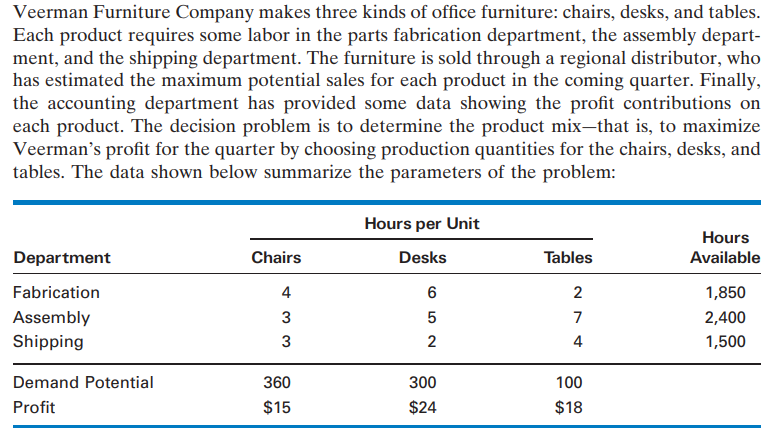

In [2]:
from IPython.display import Image
Image(filename = r"Veerman Example.PNG", width=875)

In [3]:
import pandas as pd
from pulp import *

In [6]:
# initialize problem
prob = LpProblem("Furniture_Profit",LpMaximize)

In [7]:
# Create Variables
C = LpVariable("Chair",0)
D = LpVariable("Desk",0)
T = LpVariable("Table",0)

Objective Function

In [8]:
# Objective Function
prob += 15*C + 24*D + 18*T, "Total Profit"

Constraints

In [9]:
# Constraints

#Fabrication Constraint
prob += 4*C + 6*D + 2*T <= 1850, "Fabrication Constraint"

# Assembly Constraint
prob += 3*C + 5*D + 7*T  <= 2400, "Assembly Constraint"

# Shipping Constraint
prob += 3*C + 2*D + 4*T  <= 1500, "Shipping Constraint"

# Demand Constraints
prob += C <= 360, "Chair Demand Potential"
prob += D <= 300, "Desk Demand Potential"
prob += T <= 100, "Table Demand Potential"

# Maximization so C >= 0, D >=0, T >= 0 is implicit

Solve and Status

In [10]:
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


Objective Solve

In [11]:
print("Total Profit = ", value(prob.objective))

Total Profit =  8400.0


Optimal Values

In [12]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Chair = 0.0
Desk = 275.0
Table = 100.0


Shadow Prices and Slack

In [13]:
o = [{'name':name, 'shadow price':c.pi, 'slack': c.slack} 
     for name, c in prob.constraints.items()]
print(pd.DataFrame(o))

                     name  shadow price  slack
0  Fabrication_Constraint           4.0   -0.0
1     Assembly_Constraint          -0.0  325.0
2     Shipping_Constraint          -0.0  550.0
3  Chair_Demand_Potential          -0.0  360.0
4   Desk_Demand_Potential          -0.0   25.0
5  Table_Demand_Potential          10.0   -0.0


Complete LP Problem Setup

In [14]:
print(prob)

Furniture_Profit:
MAXIMIZE
15*Chair + 24*Desk + 18*Table + 0
SUBJECT TO
Fabrication_Constraint: 4 Chair + 6 Desk + 2 Table <= 1850

Assembly_Constraint: 3 Chair + 5 Desk + 7 Table <= 2400

Shipping_Constraint: 3 Chair + 2 Desk + 4 Table <= 1500

Chair_Demand_Potential: Chair <= 360

Desk_Demand_Potential: Desk <= 300

Table_Demand_Potential: Table <= 100

VARIABLES
Chair Continuous
Desk Continuous
Table Continuous



Fabrication is a binding constraint <br>
Tables are also binding

Increase fabrication to 1851, what happens? <br>
The objective value is now 8404

The fabrication constraint is binding and has a shadow price of 4 <br>
a 1 unit change in the RHS of this constraint will result in an increase of 4 <br>
If we had one more hour of production time, how much more profit could we make? <br>

Assembly is not a binding constraint <br>
Increase Assembly to 2401, what happens?

The objective value is the same <br>
Even though you increase hours in assembly, profit does not increase

So if we have a new product "Stool" and it takes: <br>
    - 3 hours fabrication <br>
    - 2 hours assembly <br>
    - 2 hours shipping <br>
Is it profitable to make this new product? <br>

Profit - Hours_Fabrication*Shadow_Price - Hours_Assembly*Shadow_Price - Hours_Shipping**Shadow_Price <br>
10 - 3*(4) - 2*(0) - 2*(0) = -2 <br>
<br>
This is good for small changes, if other factors change, rerunning the problem is better <br>

In [ ]:
import pandas as pd
from pulp import *

# initialize problem
prob = LpProblem("Furniture Profit",LpMaximize)

# Create Variables
C = LpVariable("Chair",0)
D = LpVariable("Desk",0)
T = LpVariable("Table",0)
S = LpVariable("Stool",0)

# Objective Function
prob += 15*C + 24*D + 18*T + 10*S, "Total Cost of Ingredients per can"

# Constraints
prob += 4*C + 6*D + 2*T + 3*S<= 1850, "Fabrication Constraint"

prob += 3*C + 5*D + 7*T + 2*S <= 2400, "Assembly Constraint"

prob += 3*C + 2*D + 4*T +2*S <= 1500, "Shipping Constraint"

prob += C <= 360, "Chair Demand Potential"

prob += D <= 300, "Desk Demand Potential"

prob += T <= 100, "Table Demand Potential"

# Maximization so C >= 0, D >=0, T >= 0 is implicit

prob.solve()

# Status
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Maximum Profit = ", value(prob.objective))

# Slack
o = [{'name':name, 'shadow price':c.pi, 'slack': c.slack} 
     for name, c in prob.constraints.items()]
print(pd.DataFrame(o))


# What if we want chairs to be at least 25% of our total product mix?

# Then C / C + D + T >= 0.25

# Rewrite mathematically

# 0.75C - 0.25D - 0.25T >= 0


import pandas as pd
from pulp import *

# initialize problem
prob = LpProblem("Furniture Profit",LpMaximize)

# Create Variables
C = LpVariable("Chair",0)
D = LpVariable("Desk",0)
T = LpVariable("Table",0)

# Objective Function
prob += 15*C + 24*D + 18*T, "Total Cost of Ingredients per can"

# Constraints
prob += 4*C + 6*D + 2*T <= 1850, "Fabrication Constraint"

prob += 3*C + 5*D + 7*T  <= 2400, "Assembly Constraint"

prob += 3*C + 2*D + 4*T  <= 1500, "Shipping Constraint"

prob += C <= 360, "Chair Demand Potential"

prob += D <= 300, "Desk Demand Potential"

prob += T <= 100, "Table Demand Potential"

prob += 0.75*C - 0.25*D - 0.25*T >= 0, "Chair_product_mix_25%"

# Maximization so C >= 0, D >=0, T >= 0 is implicit

prob.solve()

# Status
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Maximum Profit = ", value(prob.objective))

# Slack
o = [{'name':name, 'shadow price':c.pi, 'slack': c.slack} 
     for name, c in prob.constraints.items()]
print(pd.DataFrame(o))